In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
#the reviews in my csv file has comma in it and the delimiter is also comma
#so i will be handling the parsing manually
import csv

with open("Restaurant_Reviews.csv", newline='', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
    
    # Skip the header row
    header = next(csv_reader)
    
    data = []   
    for row in csv_reader:
        review = ' '.join(row[:-1])
        
        # Extracting Liked value if present, otherwise set to None
        liked = row[-1] if row[-1] in ['0', '1'] else None
        data.append([review, liked])

df = pd.DataFrame(data, columns=['Review', 'Liked'])
df.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Processing Text

In [180]:
# Replace 'None' strings with actual None values
df['Liked'] = df['Liked'].replace('None', None)

# Drop rows containing None values in the "Liked" column
df.dropna(subset=['Liked'], inplace=True)

# Convert the "Liked" column to integers
df['Liked'] = df['Liked'].astype(int)


In [181]:
#tokenizing & removing stop words 
import nltk
from  nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download( "punkt")
nltk.download("stopwords")


#we dont want these to be removed
negative_words = [
    "don", "don't", "dont", "ain", "aren'", "aren't", "arent", "couldn't", "couldn",
    "didn", "didn't", "doesn", "doesn't", "dont", "hadn", "hadn't", "hasn", "hasn't",
    "haven", "haven't", "isn", "isn't", "mightn", "mightn't", "mustn", "mustn't",
    "needn", "needn't", "shan", "shan't", "shouldn", "shouldn't", "wasn", "wasn't",
    "weren", "weren't", "won", "won't", "wouldn", "wouldn't", "no", "not", "none",
    "nobody", "nothing", "nowhere", "never", "neither", "nor", "but", "however", "except",
    "without", "no", "n't", "cannot", "can't", "couldn't", "didn't", "doesn't", "don't",
    "hadn't", "hasn't", "haven't", "isn't", "mustn't", "needn't", "shan't", "shouldn't",
    "wasn't", "weren't", "won't", "wouldn't"
]
stop_words=set(stopwords.words("english"))-set(negative_words)
def remove_stopwords(review):
    words=word_tokenize(review)
    filtered_review=" ".join(word for word in words if word.lower() not in stop_words)
    return filtered_review

reviews=df["Review"].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZEYNEP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZEYNEP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [182]:
#Indexing -calculationg frequency of each token
from keras.preprocessing.text import Tokenizer
num_words=10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

frequencies =[token for sublist in sequences for token in sublist]
#each token in the dataset indexed based on their frequency in the corpus of the text data that it was fit on
#so each value in the frequencies list represent the frequency of each token in the reviews
max_freq=np.max(list(frequencies))
print(max_freq)

1917


In [183]:
df["char_cnt"]=df["Review"].apply(len)
df["token_cnt"]=df["Review"].apply(lambda x:len(str(x).split()))
df.head()

,Review,Liked,char_cnt,token_cnt
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [184]:
#dropped 12 rows that are not parsed correctly
print(df["Liked"].isnull().sum())
df.dropna()

0


,Review,Liked,char_cnt,token_cnt
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12
...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,12
996,Appetite instantly gone.,0,24,3
997,Overall I was not impressed and would not go b...,0,50,10
998,The whole experience was underwhelming and I ...,0,91,16


In [185]:
print("Avarage char count in liked reviews ", df[df["Liked"]=="1"]["char_cnt"].mean())

Avarage char count in liked reviews  nan


In [186]:
print("Avarage char count in not liked reviews ", df[df["Liked"]=="0"]["char_cnt"].mean())

Avarage char count in not liked reviews  nan


In [187]:
print("Avarage token count in liked reviews ", df[df["Liked"]=="1"]["token_cnt"].mean())

Avarage token count in liked reviews  nan


In [188]:
print("Avarage token count in not liked reviews ", df[df["Liked"]=="0"]["token_cnt"].mean())

Avarage token count in not liked reviews  nan


In [189]:
#replacing non alphabetic characters with space 
import re
reviews=reviews.str.replace(r'[^a-zA-Z\s]', '')
print(reviews)

0                                      Wow  Loved place 
1                                        Crust not good 
2                               Not tasty texture nasty 
3      Stopped late May bank holiday Rick Steve recom...
4                           selection menu great prices 
                             ...                        
995                   think food flavor texture lacking 
996                             Appetite instantly gone 
997             Overall not impressed would not go back 
998    whole experience underwhelming think ll go Nin...
999    nt wasted enough life poured salt wound drawin...
Name: Review, Length: 988, dtype: object


C:\Users\ZEYNEP\AppData\Local\Temp\ipykernel_6016\1952759860.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews=reviews.str.replace(r'[^a-zA-Z\s]', '')


Stemming

In [190]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
def stem_reviews(review):
    tokens=word_tokenize(review)
    stemmed_tokens =[stemmer.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

reviews_stemmed =reviews.apply(stem_reviews)

print(reviews_stemmed)

0                                         wow love place
1                                         crust not good
2                                 not tasti textur nasti
3      stop late may bank holiday rick steve recommen...
4                                select menu great price
                             ...                        
995                        think food flavor textur lack
996                               appetit instantli gone
997                 overal not impress would not go back
998    whole experi underwhelm think ll go ninja sush...
999    nt wast enough life pour salt wound draw time ...
Name: Review, Length: 988, dtype: object


In [191]:
df["processed_text"]=reviews_stemmed
df.head()

,Review,Liked,char_cnt,token_cnt,processed_text
0,Wow... Loved this place.,1,24,4,wow love place
1,Crust is not good.,0,18,4,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,select menu great price


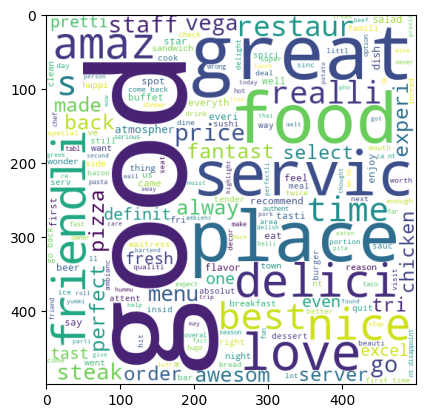

In [193]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=8,background_color="white")
positive_wordcloud=wc.generate(df[df["Liked"]==1]["processed_text"].str.cat(sep=" "))
plt.imshow(positive_wordcloud)

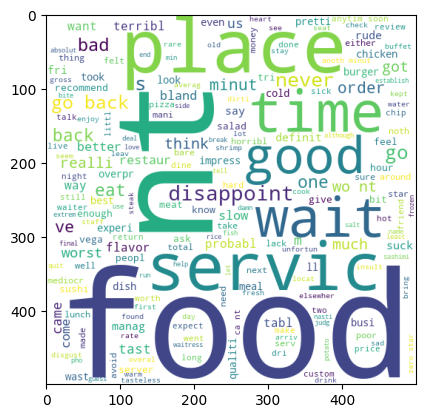

In [194]:
negative_wordcloud=wc.generate(df[df["Liked"]==0]["processed_text"].str.cat(sep=" "))
plt.imshow(negative_wordcloud)

CountVectorizer

In [195]:
from sklearn.feature_extraction.text import CountVectorizer

df['Liked'] = df['Liked'].replace('None', None)
df.dropna( inplace=True)
df['Liked'] = df['Liked'].astype(int)

cv= CountVectorizer(max_features=1500)
X=cv.fit_transform(reviews_stemmed).toarray()
X.shape


(988, 1500)

In [196]:
#assigning the independent variables

y=df["Liked"]
y.shape

(988,)

train_test_split

In [197]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


Naive Bayes

In [205]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)

evaluation

In [201]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.6767676767676768

Logistic Regression

In [202]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()


0.6767676767676768

Random Forest

In [203]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(X_train,y_train)
rf.pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)


0.6767676767676768